<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("financial_assets_prices.csv")

In [3]:
df = data.copy()

In [4]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [5]:
df.head(3)

,date,asset1,asset2,asset3,asset4,asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38


In [6]:
df.shape

(783, 6)

In [7]:
df = df.fillna(method="ffill") #rellenamos vacíos con el anterior

In [8]:
df["date"] = pd.to_datetime(df["date"])

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

### plot del dataframe sin tratar

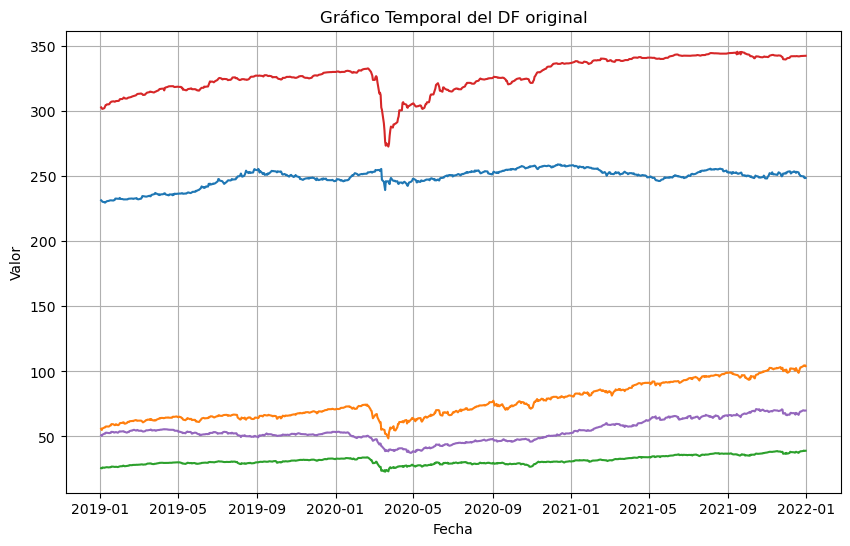

In [9]:
plt.figure(figsize=(10, 6))
for column in df.columns[1:]: #ignora la columna "date"
    plt.plot(df['date'], df[column], label=column)
plt.title('Gráfico Temporal del DF original')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)

### plot del dataframe normalizado por el primer valor

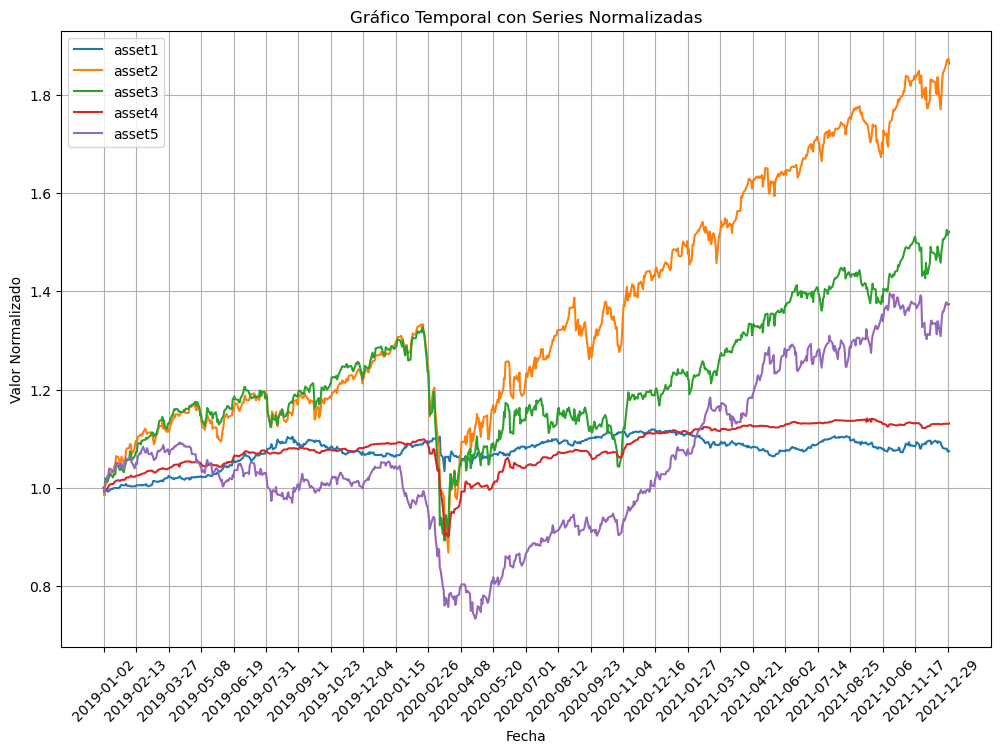

In [10]:
df_normalized = df.copy()
for column in df.columns[1:]:  # Ignora la columna "date"
    df_normalized[column] = df[column] / df[column].iloc[0] #Normaliza: valor de cada columna por el primer valor de esa columna

plt.figure(figsize=(12, 8))
for column in df_normalized.columns[1:]:
    plt.plot(df_normalized["date"], df_normalized[column], label=column)

plt.title('Gráfico Temporal con Series Normalizadas')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.xticks(df_normalized['date'][::30], rotation=45) #Se imponen 30 días de salto para ver progresión mensual
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df_normalized.head(3)

,date,asset1,asset2,asset3,asset4,asset5
0,2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019-01-03,0.997968,0.983928,0.994301,0.997293,0.990568
2,2019-01-04,0.995233,1.004546,1.019412,0.996171,1.009629


In [12]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    783 non-null    datetime64[ns]
 1   asset1  783 non-null    float64       
 2   asset2  783 non-null    float64       
 3   asset3  783 non-null    float64       
 4   asset4  783 non-null    float64       
 5   asset5  783 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 36.8 KB


<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [13]:
#iloc[:,1:] selecciona todos los indices [:] y se salta la primera columna [1:]

rendimiento_diario = df.iloc[:,1:].pct_change() #método pct: porcentaje de cambio a través de series

In [14]:
rendimiento_diario = rendimiento_diario.dropna(how="all") #dropeamos la primera línea que es nula al ser el de referencia
rendimiento_diario.head(3)

,asset1,asset2,asset3,asset4,asset5
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,-0.001512,0.012632,-0.007338,0.001856,0.014792


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [15]:
rendimiento_corr = rendimiento_diario.copy()
rendimiento_corr["date"] = df["date"]
rendimiento_corr = rendimiento_corr.corr()

rendimiento_corr

,asset1,asset2,asset3,asset4,asset5,date
asset1,1.000000,-0.088341,-0.061253,0.102252,-0.106484,-0.054158
asset2,-0.088341,1.000000,0.852491,0.526634,0.591399,0.006417
asset3,-0.061253,0.852491,1.000000,0.511550,0.557414,0.003613
asset4,0.102252,0.526634,0.511550,1.000000,0.421155,-0.020705
asset5,-0.106484,0.591399,0.557414,0.421155,1.000000,0.051713
date,-0.054158,0.006417,0.003613,-0.020705,0.051713,1.000000


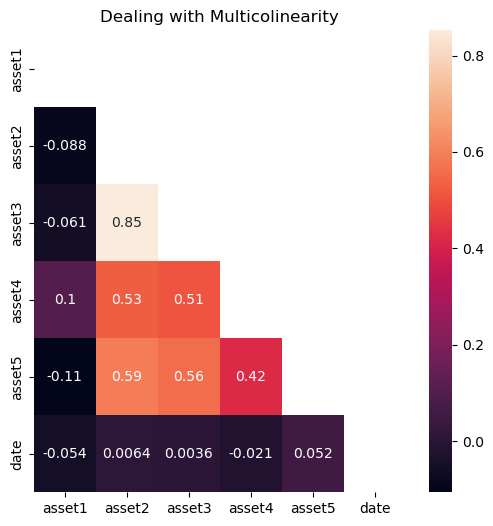

In [16]:
plt.figure(figsize=(6, 6))

mask = np.zeros_like(rendimiento_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

sns.heatmap(rendimiento_corr, cmap="rocket", annot=True, mask=mask)

plt.title("Dealing with Multicolinearity")
plt.show()

<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

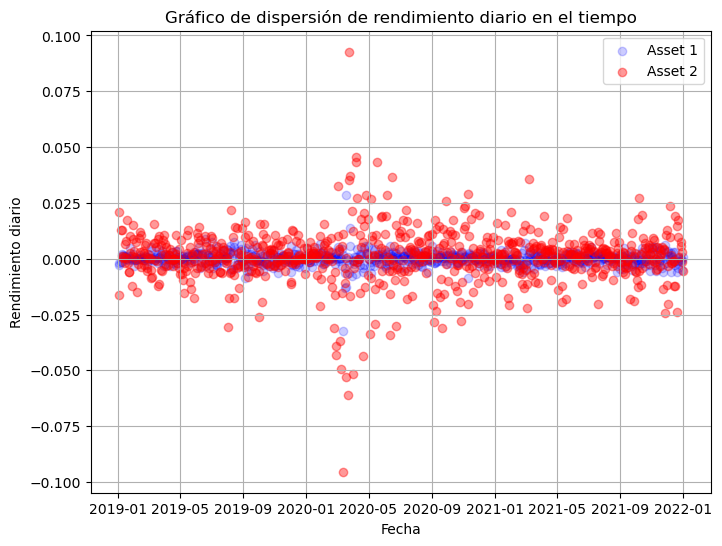

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df["date"][1::], rendimiento_diario["asset1"], alpha=0.2 ,color='blue', label="Asset 1")
plt.scatter(df["date"][1::], rendimiento_diario["asset2"], alpha=0.4 ,color='red', label="Asset 2")


plt.xlabel("Fecha")
plt.ylabel("Rendimiento diario")
plt.title("Gráfico de dispersión de rendimiento diario en el tiempo")
plt.legend()
plt.grid(True)

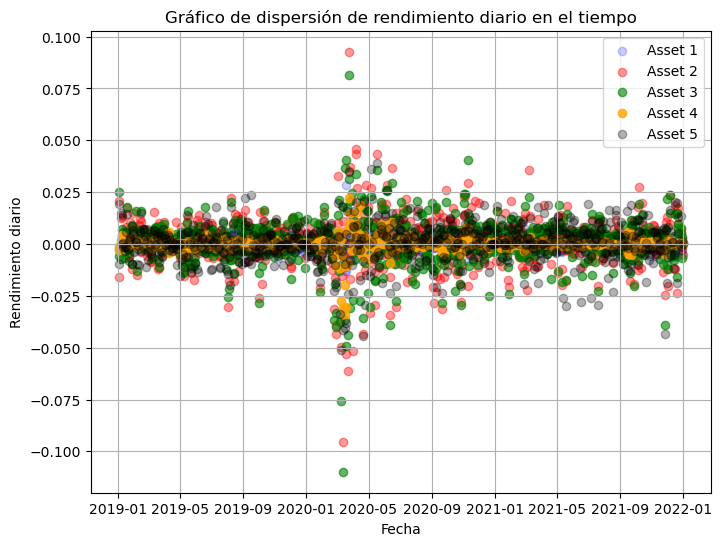

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df["date"][1::], rendimiento_diario["asset1"], alpha=0.2 ,color='blue', label="Asset 1")
plt.scatter(df["date"][1::], rendimiento_diario["asset2"], alpha=0.4 ,color='red', label="Asset 2")
plt.scatter(df["date"][1::], rendimiento_diario["asset3"], alpha=0.6 ,color='green', label="Asset 3")
plt.scatter(df["date"][1::], rendimiento_diario["asset4"], alpha=0.8 ,color='orange', label="Asset 4")
plt.scatter(df["date"][1::], rendimiento_diario["asset5"], alpha=0.3 ,color='black', label="Asset 5")

plt.xlabel("Fecha")
plt.ylabel("Rendimiento diario")
plt.title("Gráfico de dispersión de rendimiento diario en el tiempo")
plt.legend()
plt.grid(True)

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

In [19]:
data2 = pd.read_csv("portfolio_weights.csv")

In [20]:
df2 = data2.copy()

In [21]:
df2.columns = df2.columns.str.lower().str.replace(" ","_")

In [22]:
df2.head(5)

,date,asset1,asset2,asset3,asset4,asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [23]:
df2.isnull().sum()

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [24]:
df2["date"] = pd.to_datetime(df2["date"])

In [25]:
df2.head(3)

,date,asset1,asset2,asset3,asset4,asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974


<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

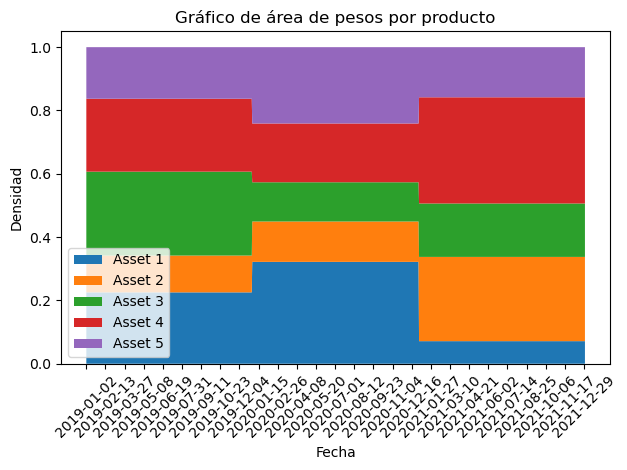

In [26]:
plt.stackplot(df2["date"], df2["asset1"], df2["asset2"], df2["asset3"], df2["asset4"], df2["asset5"], labels=['Asset 1',
                                                                                                              'Asset 2',
                                                                                                              'Asset 3',
                                                                                                              "Asset 4",
                                                                                                              "Asset 5"
                                                                                                             ])
plt.xticks(df2['date'][::30], rotation=45)
plt.title('Gráfico de área de pesos por producto')
plt.xlabel('Fecha')
plt.ylabel('Densidad')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

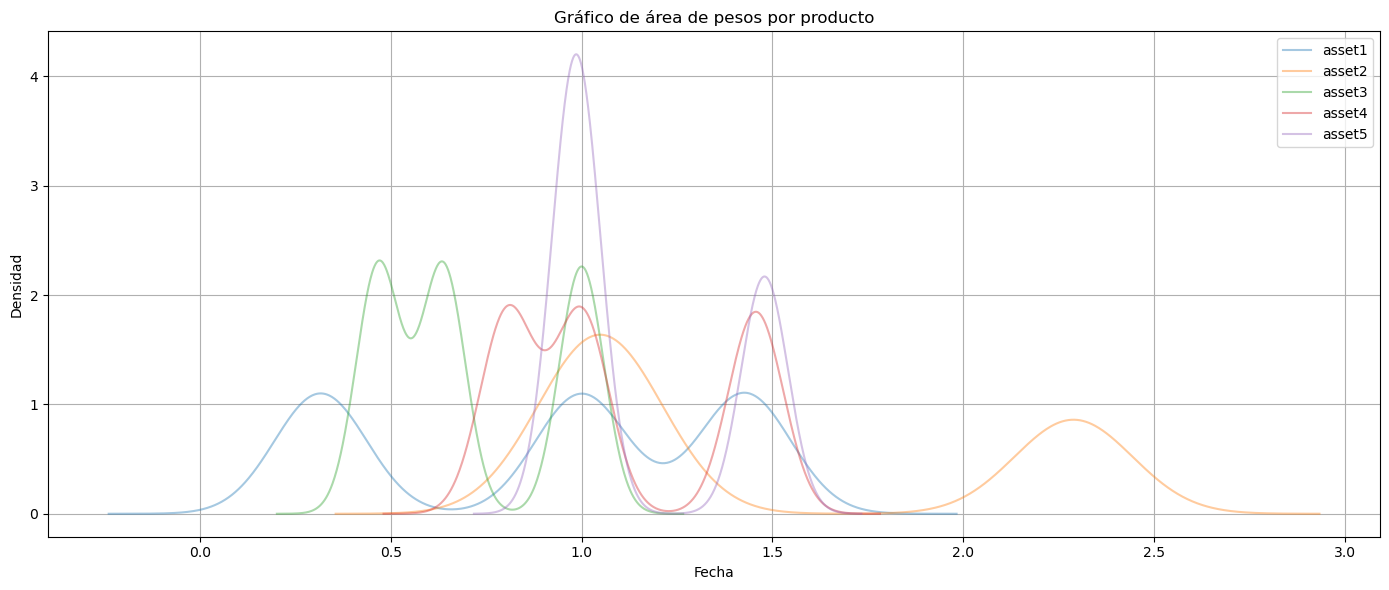

In [27]:
df2_normalized = df2.copy()

for column in df2.columns[1:]:  # Ignora la columna "date"
    df2_normalized[column] = df2[column] / df2[column].iloc[0] #Normaliza: valor de cada columna por el primer valor de esa columna

plt.figure(figsize=(14, 6))
for column in df2_normalized.columns[1:]:
    df2_normalized[column].plot.kde(alpha=0.4, label=column)

plt.title('Gráfico de área de pesos por producto')
plt.xlabel('Fecha')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

#quería etiquetar el eje x con las fechas pero todos los intentos me están deformando la gráfica

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [28]:
retornos_ponderados = rendimiento_diario * df2 #ponderar al multiplicar cada rendimiento por su peso

In [29]:
retornos_ponderados.dropna(how="all", inplace=True)

In [30]:
retornos_ponderados.drop(columns=["date"], inplace=True)
retornos_ponderados.head(3)

,asset1,asset2,asset3,asset4,asset5
1,-0.000458,-0.001868,-0.001510,-0.000623,-0.001537
2,-0.000618,0.002436,0.006693,-0.000259,0.003136
3,-0.000341,0.001468,-0.001944,0.000427,0.002411


### Rentabilidad acumulada por cada Asset 

In [31]:
date_minus_0 = df2["date"].drop(index=0)

In [32]:
retornos_w_dates = retornos_ponderados.copy()

In [33]:
retornos_w_dates["date"] = date_minus_0

In [34]:
retornos_w_dates = retornos_w_dates[["date","asset1","asset2","asset3","asset4","asset5"]]
retornos_w_dates.head(1)

,date,asset1,asset2,asset3,asset4,asset5
1,2019-01-03,-0.000458,-0.001868,-0.00151,-0.000623,-0.001537


In [35]:
#Sumamos 1 a la rentabilidad para pasar a crecimiento, aplicamos cumprod() para acumular, restamos 1 para volver a porcentajes

for column in retornos_w_dates.columns[1:]:  
    retornos_w_dates[column] = (1 + retornos_w_dates[column]).cumprod()-1

In [36]:
retornos_w_dates.head(2)

,date,asset1,asset2,asset3,asset4,asset5
1,2019-01-03,-0.000458,-0.001868,-0.001510,-0.000623,-0.001537
2,2019-01-04,-0.001076,0.000563,0.005172,-0.000882,0.001594


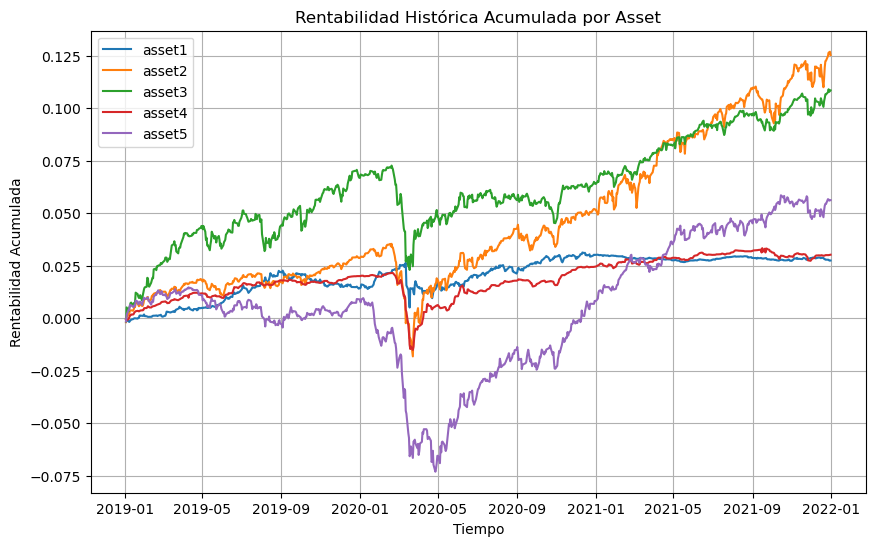

In [37]:
plt.figure(figsize=(10, 6))

for column in retornos_w_dates.columns[1:]:
    plt.plot(retornos_w_dates["date"], retornos_w_dates[column], label=column)

plt.title('Rentabilidad Histórica Acumulada por Asset')
plt.xlabel('Tiempo')
plt.ylabel('Rentabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()

## Rentabilidad acumulada de toda la cartera

In [38]:
rentabilidad = retornos_ponderados.sum(axis=1) #rentabilidad sumando valores ponderados por cada entrada

In [39]:
rentabilidad_w_dates = pd.DataFrame(rentabilidad)
rentabilidad_w_dates["date"] = date_minus_0
rentabilidad_w_dates.rename(columns={0:"asset prime"}, inplace=True)
rentabilidad_w_dates = rentabilidad_w_dates[["date","asset prime"]]
rentabilidad_w_dates.head(3)

,date,asset prime
1,2019-01-03,-0.005997
2,2019-01-04,0.011388
3,2019-01-07,0.002021


In [40]:
#Sumamos 1 a la rentabilidad para parasar a crecimiento, aplicamos cumprod() para acumular, restamos 1 para volver a porcentajes

for column in rentabilidad_w_dates.columns[1:]: 
    rentabilidad_w_dates[column] = (1 + rentabilidad_w_dates[column]).cumprod()-1
rentabilidad_w_dates.head(3)

,date,asset prime
1,2019-01-03,-0.005997
2,2019-01-04,0.005322
3,2019-01-07,0.007354


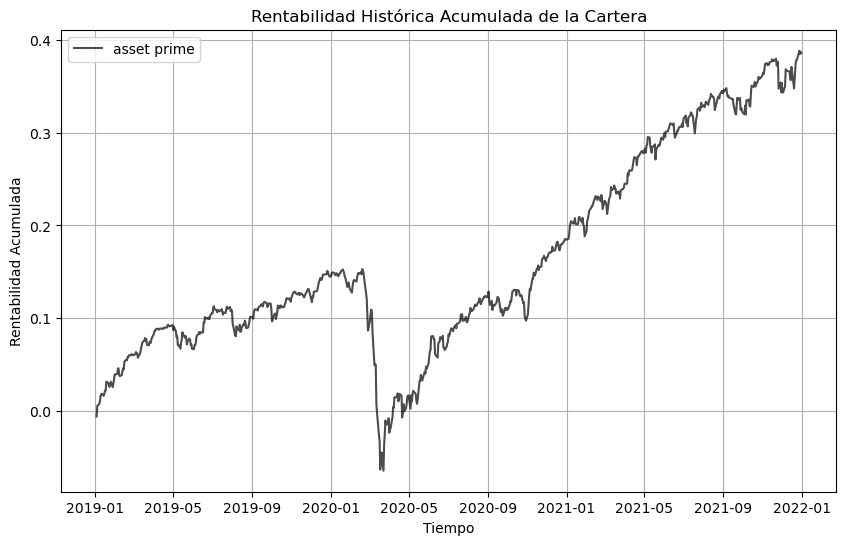

In [41]:
plt.figure(figsize=(10, 6))

for column in rentabilidad_w_dates.columns[1:]:
    plt.plot(rentabilidad_w_dates["date"], rentabilidad_w_dates[column], label=column, color="black", alpha=0.7)

plt.title('Rentabilidad Histórica Acumulada de la Cartera')
plt.xlabel('Tiempo')
plt.ylabel('Rentabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()


<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

### Rentabilidad anual por Assets

In [42]:
retornos_ponderados.head(3)

,asset1,asset2,asset3,asset4,asset5
1,-0.000458,-0.001868,-0.001510,-0.000623,-0.001537
2,-0.000618,0.002436,0.006693,-0.000259,0.003136
3,-0.000341,0.001468,-0.001944,0.000427,0.002411


In [43]:
retornos_year = retornos_ponderados.copy()

In [44]:
retornos_year["date"] = date_minus_0

In [45]:
retornos_year = retornos_year[["date","asset1","asset2","asset3","asset4","asset5"]]
retornos_year.head(3)

,date,asset1,asset2,asset3,asset4,asset5
1,2019-01-03,-0.000458,-0.001868,-0.001510,-0.000623,-0.001537
2,2019-01-04,-0.000618,0.002436,0.006693,-0.000259,0.003136
3,2019-01-07,-0.000341,0.001468,-0.001944,0.000427,0.002411


#### Rentabilidad 2019

In [46]:
retornos_2019 = retornos_year[retornos_year["date"].dt.year == 2019]

In [47]:
for column in retornos_2019.columns[1:]:  
    retornos_2019[column] = (1 + retornos_2019[column]).cumprod()-1

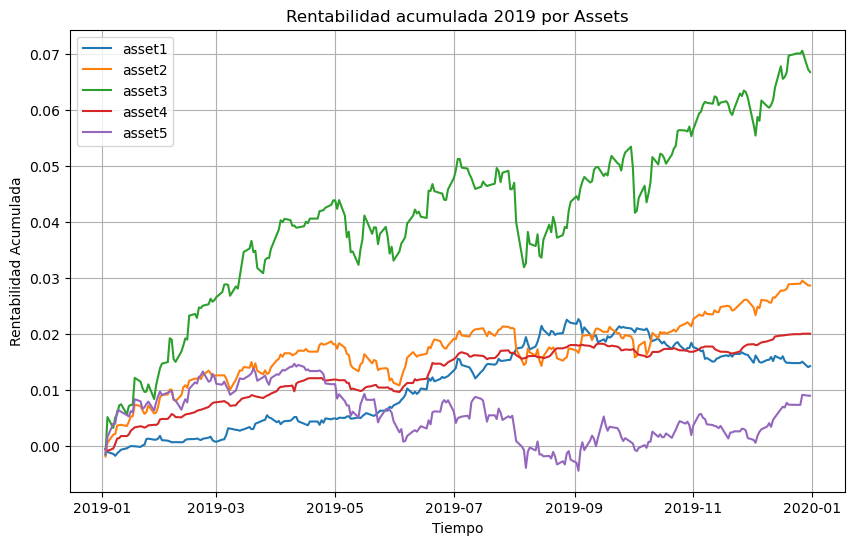

In [48]:
plt.figure(figsize=(10, 6))

for column in retornos_2019.columns[1:]:
    plt.plot(retornos_2019["date"], retornos_2019[column], label=column)

plt.title('Rentabilidad acumulada 2019 por Assets')
plt.xlabel('Tiempo')
plt.ylabel('Rentabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()

#### Rentabilidad 2020

In [49]:
retornos_2020 = retornos_year[retornos_year["date"].dt.year == 2020]

In [50]:
for column in retornos_2020.columns[1:]:  
    retornos_2020[column] = (1 + retornos_2020[column]).cumprod()-1

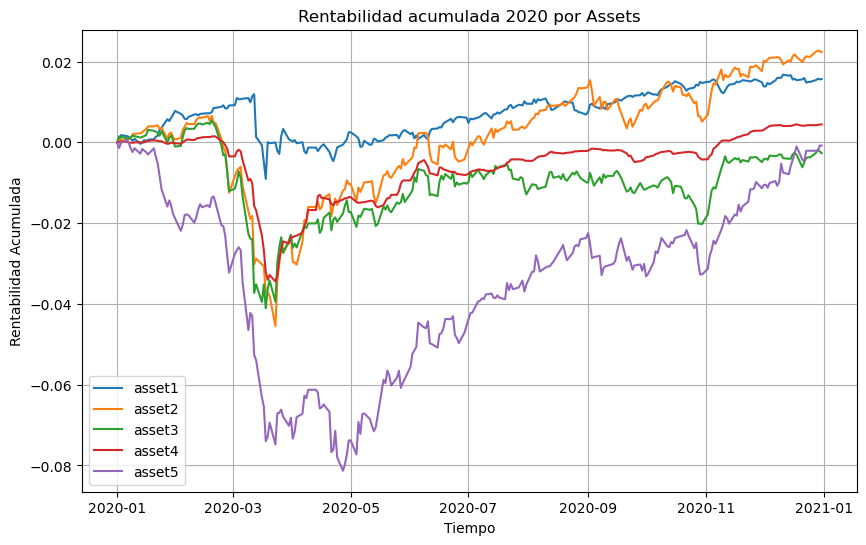

In [51]:
plt.figure(figsize=(10, 6))

for column in retornos_2020.columns[1:]:
    plt.plot(retornos_2020["date"], retornos_2020[column], label=column)

plt.title('Rentabilidad acumulada 2020 por Assets')
plt.xlabel('Tiempo')
plt.ylabel('Rentabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()

#### Rentabilidad 2021

In [52]:
retornos_2021 = retornos_year[retornos_year["date"].dt.year == 2021]

In [53]:
for column in retornos_2021.columns[1:]:  
    retornos_2021[column] = (1 + retornos_2021[column]).cumprod()-1

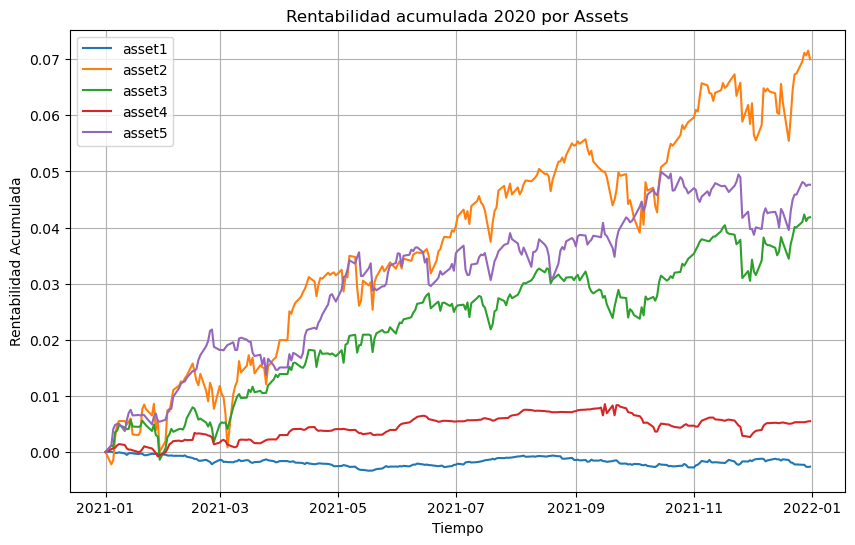

In [54]:
plt.figure(figsize=(10, 6))

for column in retornos_2021.columns[1:]:
    plt.plot(retornos_2021["date"], retornos_2021[column], label=column)

plt.title('Rentabilidad acumulada 2021 por Assets')
plt.xlabel('Tiempo')
plt.ylabel('Rentabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()

### Rentabilidad anual por Assets

In [55]:
rentabilidad

1     -0.005997
2      0.011388
3      0.002021
4      0.002435
5      0.005780
         ...   
778    0.004947
779    0.002565
780   -0.002330
781    0.001603
782   -0.001231
Length: 782, dtype: float64

In [56]:
rentabilidad_year = pd.DataFrame(rentabilidad)
rentabilidad_year["date"] = date_minus_0
rentabilidad_year.rename(columns={0:"asset prime"}, inplace=True)
rentabilidad_year = rentabilidad_year[["date","asset prime"]]
rentabilidad_year.head(3)

,date,asset prime
1,2019-01-03,-0.005997
2,2019-01-04,0.011388
3,2019-01-07,0.002021


#### Rentabilidad 2019

In [57]:
rentabilidad_2019 = rentabilidad_year[rentabilidad_year["date"].dt.year == 2019]

In [58]:
for column in rentabilidad_2019.columns[1:]: 
    rentabilidad_2019[column] = (1 + rentabilidad_2019[column]).cumprod()-1

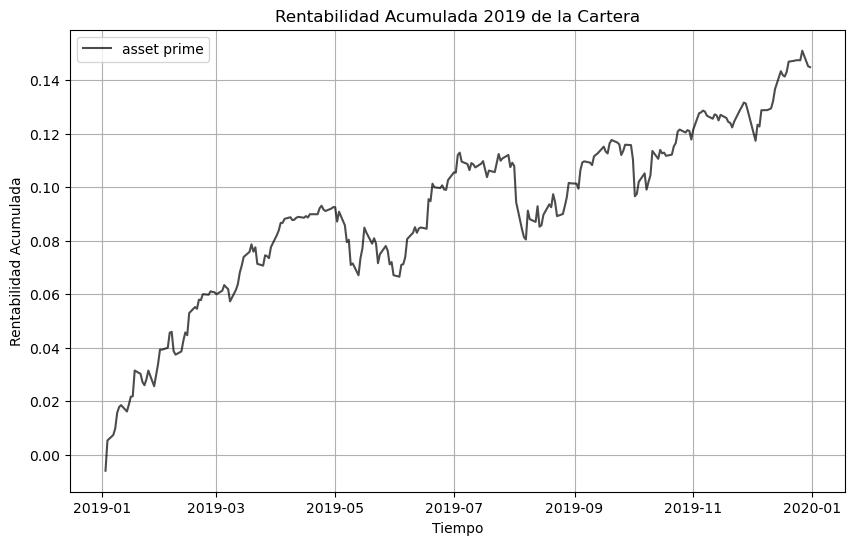

In [59]:
plt.figure(figsize=(10, 6))

for column in rentabilidad_2019.columns[1:]:
    plt.plot(rentabilidad_2019["date"], rentabilidad_2019[column], label=column, color="black", alpha=0.7)

plt.title('Rentabilidad Acumulada 2019 de la Cartera')
plt.xlabel('Tiempo')
plt.ylabel('Rentabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()

#### Rentabilidad 2020

In [60]:
rentabilidad_2020 = rentabilidad_year[rentabilidad_year["date"].dt.year == 2020]

In [61]:
for column in rentabilidad_2020.columns[1:]: 
    rentabilidad_2020[column] = (1 + rentabilidad_2020[column]).cumprod()-1

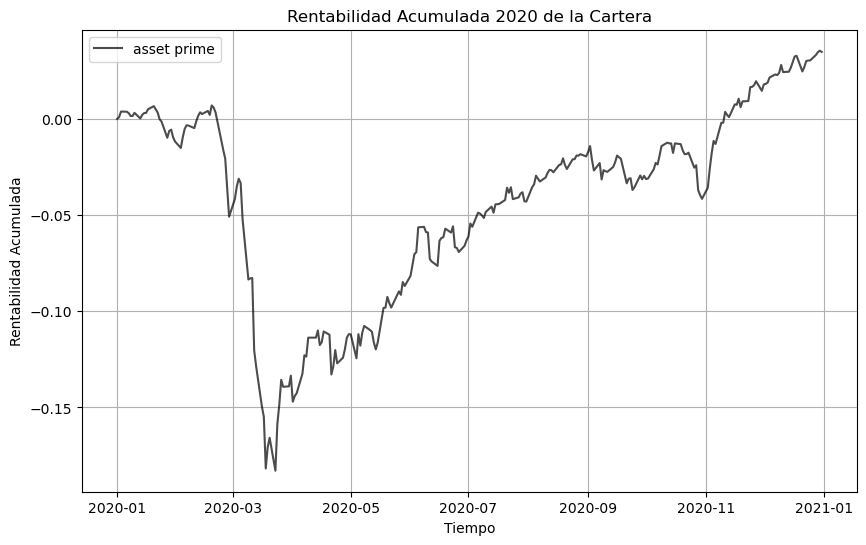

In [62]:
plt.figure(figsize=(10, 6))

for column in rentabilidad_2020.columns[1:]:
    plt.plot(rentabilidad_2020["date"], rentabilidad_2020[column], label=column, color="black", alpha=0.7)

plt.title('Rentabilidad Acumulada 2020 de la Cartera')
plt.xlabel('Tiempo')
plt.ylabel('Rentabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()

#### Rentabilidad 2021

In [63]:
rentabilidad_2021 = rentabilidad_year[rentabilidad_year["date"].dt.year == 2021]

In [64]:
for column in rentabilidad_2021.columns[1:]: 
    rentabilidad_2021[column] = (1 + rentabilidad_2021[column]).cumprod()-1

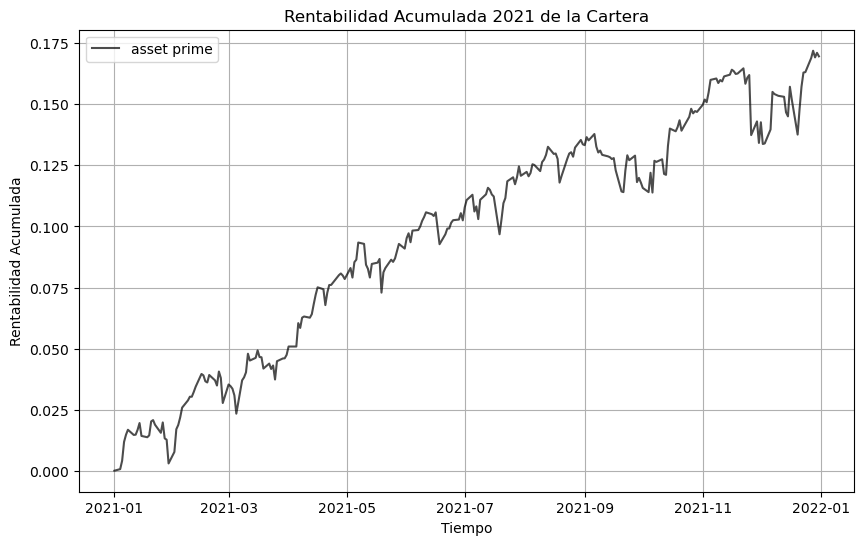

In [65]:
plt.figure(figsize=(10, 6))

for column in rentabilidad_2021.columns[1:]:
    plt.plot(rentabilidad_2021["date"], rentabilidad_2021[column], label=column, color="black", alpha=0.7)

plt.title('Rentabilidad Acumulada 2021 de la Cartera')
plt.xlabel('Tiempo')
plt.ylabel('Rentabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [66]:
rendimiento_vol = rendimiento_diario.copy()

In [67]:
rendimiento_vol.head(3)

,asset1,asset2,asset3,asset4,asset5
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,-0.001512,0.012632,-0.007338,0.001856,0.014792


In [68]:
period = 20

In [69]:
vol = rendimiento_vol.rolling(period).std()*np.sqrt(period)

In [70]:
vol = vol.iloc[period:]

In [71]:
vol.head(3)

,asset1,asset2,asset3,asset4,asset5
21,0.007052,0.038470,0.037172,0.006418,0.034650
22,0.007376,0.034370,0.028806,0.006026,0.031050
23,0.007142,0.033133,0.027186,0.006098,0.028139


In [72]:
vol["date"] = date_minus_0

In [73]:
vol = vol[["date","asset1","asset2","asset3","asset4","asset5"]]
vol.head(1)

,date,asset1,asset2,asset3,asset4,asset5
21,2019-01-31,0.007052,0.03847,0.037172,0.006418,0.03465


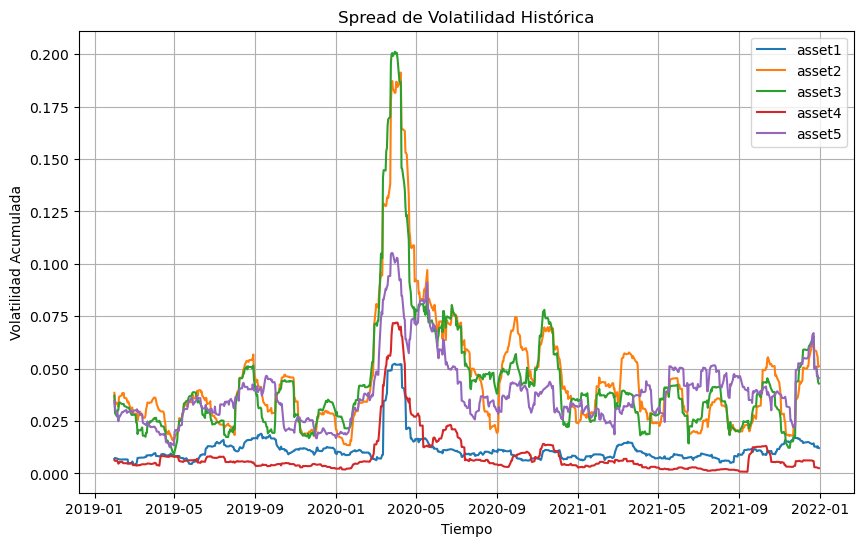

In [75]:
plt.figure(figsize=(10, 6))

for column in vol.columns[1:]:
    plt.plot(vol["date"], vol[column], label=column)

plt.title("Spread de Volatilidad Histórica")
plt.xlabel('Tiempo')
plt.ylabel('Volatilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()